# Lab 6: Univariate Linear Regression

### Due Date: Tuesday April 4, 2019 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a univariate linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on new data


## Initialize

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains grades from CS 205 course in fall 2018. The dataset (with no ID's) contain midterm and final exam grades of Rutgers students (including other assignment grades). 

# Task 1 - Initialization
Read the file into a dataframe and keep only the midtermRaw and FinaRaw columns. We will be doing univariate regression on x=midterm, y=finalExam
The goal is to find a model that will allow us to predict the final exam score given the midterm score.

### Activity 1.1  Read Data

In [44]:
import pandas as pd
df = pd.read_csv("data/CS205_grades_12_19_18_Final.csv")
df_cleaned = df[['midtermRaw','finalRaw']]
# drop all undefined rows 
df_cleaned = df_cleaned.dropna() 
df_cleaned.head()

,midtermRaw,finalRaw
3,45.5,62.0
4,58.0,60.5
5,68.0,32.0
6,64.5,50.5
7,74.0,51.0


### Activity 1.2 Normalize Data
In this task, you need to normalize data using MinMaxScaler from sklearn.preprocessing. Normalize midterm and final scores to be between 0 and 1. X_scaled_values and Y_scaled_values are the normalized midterm and final exam scores.

In [45]:
# BEGIN SOLUTION
from sklearn.preprocessing import MinMaxScaler
X = df_cleaned.dropna().iloc[:,[0]]
Y = df_cleaned.dropna().iloc[:,[1]]

scaler = MinMaxScaler()

X_scaled_values = scaler.fit_transform(X)
X_scaled_values[:,:] = X_scaled_values

Y_scaled_values = scaler.fit_transform(Y) 
Y_scaled_values[:,:] = Y_scaled_values

# END SOLUTION


# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

print(x,y)

[[0.37857143]
 [0.55714286]
 [0.7       ]
 [0.65      ]
 [0.78571429]
 [0.47857143]
 [0.32142857]
 [0.80714286]
 [0.58571429]
 [0.06428571]
 [0.53571429]
 [0.46428571]
 [0.42142857]
 [0.83571429]
 [0.35      ]
 [0.        ]
 [0.65      ]
 [0.48571429]
 [0.55      ]
 [0.49285714]
 [1.        ]
 [0.6       ]
 [0.31428571]
 [0.61428571]
 [0.55714286]
 [0.48571429]
 [0.04285714]
 [0.5       ]
 [0.23571429]
 [0.73571429]
 [0.59285714]
 [0.48571429]
 [0.15714286]
 [0.83571429]
 [0.14285714]
 [0.35      ]
 [0.41428571]
 [0.62142857]
 [1.        ]
 [0.70714286]
 [0.56428571]
 [0.9       ]
 [0.73571429]
 [0.24285714]
 [0.41428571]
 [0.65      ]
 [0.52142857]
 [0.65714286]
 [0.38571429]
 [0.4       ]
 [0.55      ]
 [0.52857143]
 [0.46428571]
 [0.81428571]
 [0.6       ]
 [0.54285714]
 [0.1       ]
 [0.50714286]
 [0.2       ]
 [0.63571429]
 [0.25714286]
 [0.94285714]
 [0.36428571]
 [0.53571429]
 [0.8       ]
 [0.34285714]
 [0.65      ]
 [0.67142857]
 [0.60714286]
 [0.31428571]
 [0.72142857]
 [0.55

### Activity 1.3 Plot the data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable.

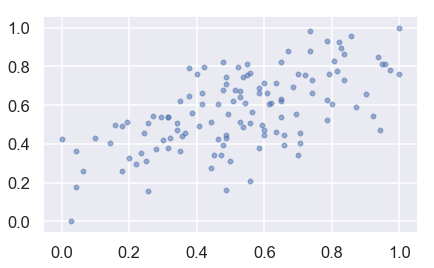

In [46]:
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
plt.scatter(x,y, alpha=0.5, s=20)

### END SOLUTION

## Question 1.4
### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression? Why?
No, I don't we should use Linear Regression. Linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables. The relationship between different variables in the graph above is not consistent. 


### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the error
$$
E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [47]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1*x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. Note that we assume global x and y vectors and do not pass them to the sqerror function and other functions that follow. This is a bad practice, but for the sake of simplicity we will do that.

In [48]:
import numpy as np

## BEGIN SOLUTION
def sqerror(theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L2 square error sum
    Assumptions: none
    """
    err = np.sum(np.square(h(theta0,theta1,x) - y))
    return err

## END SOLUTION
## testing
sqerror(0.29,0.52)

2.8891990884384047

### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [49]:
import numpy as np
import math

## BEGIN SOLUTION
def abserror(theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error sum
    Assumptions: none
    """
    err = np.sum(np.abs(h(theta0,theta1,x) - y) )
    return err
   

## END SOLUTION

## testing
abserror(0.29,0.52)

15.484200426439234

### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, phuberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
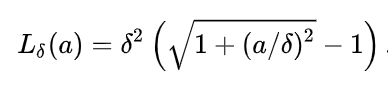
The following function finds the average huber error.

In [50]:
import numpy as np
import math

## BEGIN SOLUTION
def huberror(theta0, theta1, delta):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    alpha = np.average(np.abs(h(theta0,theta1,x) - y) )
    pherror = np.square(delta) * (np.sqrt(1 + np.square(alpha/delta))-1)
    return pherror

## END SOLUTION

## testing
huberror(0.29,0.52,0.1)

0.006077232439047499

### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget (as in Lab5) to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [51]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [52]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y = h(theta0, theta1, x) 
    # compose plot
    pylab.plot(x,y) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(theta0, theta1,0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = X_scaled_values   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [53]:


# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.60
theta1 =0.00
error = 0.0015
# BEST VALUES FOR AVE ABS ERROR
theta0 = 0.60
theta1 = 0.10
error = 0.0015

# BEST VALUES FOR AVE HUBER ERROR
theta0 =0.60
theta1 =0.10
error = 0.0015

# Task 3 - Gradient Descent
In this task we need to use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the graph. The iterative formulas for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x_j + \theta_0)-y_j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x_j + \theta_0 - y_j)*x_j
$$

The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute using Gradient Descent algorithm (L2 loss)

In [56]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1
# that reach the error threshold.
# The convergence is reached when the newError - oldError is less than the threshold.

# BEGIN SOLUTION  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    iterations = 1
    prevtheta0 = 0
    prevtheta1 = 0
    
    theta0 = prevtheta0 - alpha*(np.sum(prevtheta1*obsX+prevtheta0)-obsY)
    theta1 = prevtheta1 - alpha*(np.sum(prevtheta1*obsX+prevtheta0-obsY)*obsX)
    
    oldError = sqerror(theta0,theta1)
    
    prevtheta0 = theta0
    prevtheta1 = theta1
    iterations = iterations + 1
    
    theta0 = prevtheta0 - alpha*(np.sum(prevtheta1*obsX+prevtheta0)-obsY)
    theta1 = prevtheta1 - alpha*(np.sum(prevtheta1*obsX+prevtheta0-obsY)*obsX)
    
    newError =sqerror(theta0, theta1)
    while(newError-oldError > threshold):
        oldError = newError
        prevtheta0 = theta0
        prevtheta1 = theta1
        iterations = iterations + 1
    return [theta0,theta1,newError,iterations]
        
    
    
# END SOLUTION

[theta0,theta1,newError,iterations] = gd2(x,y,0.01,0.0001)
print(iterations)

3


In [57]:
# observe theta0 and theta1
theta0, theta1

(array([[-0.28178107],
        [-0.28222883],
        [-0.29073629],
        [-0.2852139 ],
        [-0.28506465],
        [-0.28969152],
        [-0.28894525],
        [-0.2810348 ],
        [-0.28431838],
        [-0.29237808],
        [-0.28267659],
        [-0.28551241],
        [-0.28163181],
        [-0.2829751 ],
        [-0.29028853],
        [-0.2890945 ],
        [-0.2849154 ],
        [-0.28342286],
        [-0.28133331],
        [-0.28655719],
        [-0.28237808],
        [-0.28819898],
        [-0.2868557 ],
        [-0.28551241],
        [-0.29342286],
        [-0.28864674],
        [-0.29401987],
        [-0.29133331],
        [-0.29058704],
        [-0.27790047],
        [-0.28760196],
        [-0.28894525],
        [-0.28760196],
        [-0.28028853],
        [-0.28954226],
        [-0.2852139 ],
        [-0.28431838],
        [-0.28536316],
        [-0.27760196],
        [-0.28849749],
        [-0.28625868],
        [-0.28446764],
        [-0.27999002],
        [-0

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for huber gradient descent using derivative methods discussed in class. Similar to L2 descent, use the new formulas (obtained from huber derivatives) to compute values of theta1, theta1, error

In [61]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN SOLUTION

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    iterations = 1
    prevtheta0 = 0
    prevtheta1 = 0
    
    theta0 = prevtheta0 - alpha*(np.sum(prevtheta1*obsX+prevtheta0)-obsY)
    theta1 = prevtheta1 - alpha*(np.sum(prevtheta1*obsX+prevtheta0-obsY)*obsX)
    
    oldError = huberror(theta0,theta1,delta)
    
    prevtheta0 = theta0
    prevtheta1 = theta1
    iterations = iterations + 1
    
    theta0 = prevtheta0 - alpha*(np.sum(prevtheta1*obsX+prevtheta0)-obsY)
    theta1 = prevtheta1 - alpha*(np.sum(prevtheta1*obsX+prevtheta0-obsY)*obsX)
    
    newError =huberror(theta0, theta1,delta)
    while(newError-oldError > threshold):
        oldError = newError
        prevtheta0 = theta0
        prevtheta1 = theta1
        iterations = iterations + 1
    return [theta0,theta1,newError,iterations]
    
 
## END SOLUTION
# testing    
[theta0,theta1,newError,iterations] = gdh(x,y,0.01,0.000001,0.01)
print(iterations)

3


### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER
1. theta0 = [-0.28237808],[-0.28670644],[-0.28864674]; theta1 = [0.88256441],[1.02568297],[0.66788658]
2. The new values all show different things, there's no similarity 

##### END ANSWER

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x,y)
print(result.intercept_)
print(result.coef_)

[0.29620134]
[[0.5238794]]


In [64]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(theta0,theta1)
#Answer: Coefficients are [0.29620134],[[0.5238794]]. It's not necessarily close to the gradient descent, the error is bigger than squared error. 

2.8807167362296515

## Task 4- Predict Your Final Exam Score
The regression line was obtained using grades from CS 205 course. We can consider them to be training data. Now we trained a model (with theta0 and theta1) so we can predict the grade for your own course based on your midterm grade.
We will do few things before we can accomplish this task.

### Activity 4.1 Read the midterm grades
The grade file for CS439 midterm is given in data/CS439_grades.csv. Read this data file to a new 

In [65]:
import pandas as pd
df_439 = pd.read_csv("data/CS439_grades_03_15_19.csv")
df_439.info()
mid = df_439[df_439['midterm']<80]
mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
midterm    97 non-null float64
dtypes: float64(1)
memory usage: 856.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 96
Data columns (total 1 columns):
midterm    96 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


### Activity 4.2 Predict your Grade
Scale the values in the midterm grades of CS 439 and compute the estimated final exam grade. Note that this is probably not a very good estimator since we are trying to predict final exam just by using a midterm score. However, using more features such as labs and quiz scores can help improve the accuracy. We will do that in a future lab. The output is shown as values scaled back to percentages (100% max)

In [71]:
from sklearn import preprocessing
import numpy as np 

## BEGIN SOLUTION
min_max = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler =  preprocessing.MinMaxScaler(feature_range=(29.62013352,82))
midterm_score = min_max.fit_transform(mid[['midterm']])
final_score = scaler.fit_transform(midterm_score)
midterm_score= np.around(midterm_score,decimals=1)
midterm_score=midterm_score.tolist()
midterm_score=[i[0] for i in midterm_score]
final_score = np.around(final_score,decimals=1)
for i in range(0,len(final_score)):
    print(midterm_score[i], final_score[[i]])
    
## END SOLUTION

61.5 [[61.9]]
42.3 [[51.8]]
52.6 [[57.2]]
12.8 [[36.3]]
94.9 [[79.3]]
56.4 [[59.2]]
39.7 [[50.4]]
46.2 [[53.8]]
43.6 [[52.5]]
21.8 [[41.]]
48.7 [[55.1]]
43.6 [[52.5]]
75.6 [[69.2]]
65.4 [[63.9]]
52.6 [[57.2]]
43.6 [[52.5]]
61.5 [[61.9]]
42.3 [[51.8]]
60.3 [[61.2]]
100.0 [[82.]]
70.5 [[66.6]]
61.5 [[61.9]]
0.0 [[29.6]]
53.8 [[57.8]]
34.6 [[47.8]]
83.3 [[73.3]]
67.9 [[65.2]]
91.0 [[77.3]]
29.5 [[45.1]]
73.1 [[67.9]]
67.9 [[65.2]]
2.6 [[31.]]
61.5 [[61.9]]
69.2 [[65.9]]
48.7 [[55.1]]
98.7 [[81.3]]
34.6 [[47.8]]
60.3 [[61.2]]
44.9 [[53.1]]
50.0 [[55.8]]
69.2 [[65.9]]
60.3 [[61.2]]
83.3 [[73.3]]
26.9 [[43.7]]
61.5 [[61.9]]
20.5 [[40.4]]
19.2 [[39.7]]
6.4 [[33.]]
80.8 [[71.9]]
44.9 [[53.1]]
26.9 [[43.7]]
14.1 [[37.]]
67.9 [[65.2]]
51.3 [[56.5]]
24.4 [[42.4]]
78.2 [[70.6]]
23.1 [[41.7]]
60.3 [[61.2]]
71.8 [[67.2]]
85.9 [[74.6]]
50.0 [[55.8]]
37.2 [[49.1]]
73.1 [[67.9]]
62.8 [[62.5]]
59.0 [[60.5]]
70.5 [[66.6]]
5.1 [[32.3]]
34.6 [[47.8]]
19.2 [[39.7]]
50.0 [[55.8]]
67.9 [[65.2]]
7.7 [[33.6]]
6

Lab Developed by A.D. Gunawardena @ 2019 for CS 439